## Importação das bibliotecas
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Pré-processamento dos dados
___

In [2]:
# Carregando as tabelas de vendas
vendas2021 = pd.read_excel("demanda2021.xls")
vendas2022 = pd.read_excel("demanda2022.xls")
vendas2023 = pd.read_excel("demanda2023.xls")
vendas2024 = pd.read_excel("demanda2024.xls")

# Contando os produtos únicos em cada ano
produtos2021 = vendas2021['Código'].nunique()
produtos2022 = vendas2022['Código'].nunique()
produtos2023 = vendas2023['Código'].nunique()
produtos2024 = vendas2024['Código'].nunique()

# Criando um dicionário para armazenar os resultados
resultados = {
    'Ano': [2021, 2022, 2023, 2024],
    'Produtos unicos vendido': [produtos2021, produtos2022, produtos2023, produtos2024]
}

# Convertendo para um DataFrame
dfProdutosUnicos = pd.DataFrame(resultados)

### Produtos Unicos Vendidos em Cada Ano
___

In [3]:
dfProdutosUnicos.head()

,Ano,Produtos unicos vendido
0,2021,13949
1,2022,15342
2,2023,15788
3,2024,12765


Identifica os produtos vendidos em 2021 e em pelo menos um dos anos seguintes (2022, 2023, 2024):

In [4]:
# Coletando os códigos de produtos de cada ano
produtos2021 = set(vendas2021['Código'])
produtos2022 = set(vendas2022['Código'])
produtos2023 = set(vendas2023['Código'])
produtos2024 = set(vendas2024['Código'])

# Criando uma lista para armazenar produtos que estão em 2021 e em pelo menos um dos anos seguintes
produtos_filtrados = []

# Iterando sobre os produtos de 2021
for produto in produtos2021:
    # Verificando se o produto está presente em 2022, 2023 ou 2024
    if produto in produtos2022 or produto in produtos2023 or produto in produtos2024:
        produtos_filtrados.append(produto)

# Contando a quantidade total de produtos em cada ano que estão nos produtos filtrados
quantidade_2021 = vendas2021[vendas2021['Código'].isin(produtos_filtrados)].shape[0]
quantidade_2022 = vendas2022[vendas2022['Código'].isin(produtos_filtrados)].shape[0]
quantidade_2023 = vendas2023[vendas2023['Código'].isin(produtos_filtrados)].shape[0]
quantidade_2024 = vendas2024[vendas2024['Código'].isin(produtos_filtrados)].shape[0]

# Criando um dicionário para armazenar os resultados
resultados = {
    'Ano': [2021, 2022, 2023, 2024],
    'Quantidade de Produtos': [quantidade_2021, quantidade_2022, quantidade_2023, quantidade_2024]
}

# Convertendo para um DataFrame
df_quantidade_produtos = pd.DataFrame(resultados)

# Exibindo o DataFrame com as quantidades
df_quantidade_produtos.head()

,Ano,Quantidade de Produtos
0,2021,9644
1,2022,8530
2,2023,5570
3,2024,3966


Filtra os produtos de 2021 para os dataframes de 2021,2022,2023,2024

In [5]:
# Obtém os códigos dos produtos que aparecem em todos os anos
produtos_2021 = set(vendas2021['Código'])
produtos_2022 = set(vendas2022['Código'])
produtos_2023 = set(vendas2023['Código'])
produtos_2024 = set(vendas2024['Código'])

# Interseção para encontrar produtos presentes em todos os anos
produtos_comuns = produtos_2021.intersection(produtos_2022, produtos_2023, produtos_2024)

# Filtra os DataFrames de vendas para incluir apenas os produtos comuns
vendas2021 = vendas2021[vendas2021['Código'].isin(produtos_comuns)]
vendas2022 = vendas2022[vendas2022['Código'].isin(produtos_comuns)]
vendas2023 = vendas2023[vendas2023['Código'].isin(produtos_comuns)]
vendas2024 = vendas2024[vendas2024['Código'].isin(produtos_comuns)]

# Carrega as alterações de preço
alteracoes_preco = pd.read_excel('alteracaoPreco.xls')
alteracoes_preco['Data'] = pd.to_datetime(alteracoes_preco['Data'])

# Meses do ano
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Função para obter o preço em um mês específico
def obter_preco(codigo, mes, ano):
    # Filtra as alterações de preço para o produto específico
    alteracoes = alteracoes_preco[alteracoes_preco['Código'] == codigo]
    # Filtra as alterações antes do mês específico
    alteracoes = alteracoes[alteracoes['Data'] <= f'{ano}-{mes:02d}-01']
    if not alteracoes.empty:
        # Retorna o preço mais recente antes do mês específico
        return alteracoes.iloc[-1]['Atual']
    else:
        return 0  # Retorna 0 se não houver preço disponível

# Função para calcular a receita para um determinado ano
def calcular_receita_anual(vendas_mensais, ano):
    for i, mes in enumerate(meses, 1):
        vendas_mensais[f'receita_{mes}'] = vendas_mensais.apply(
            lambda row: row[mes] * obter_preco(row['Código'], i, ano) if row[mes] is not None else 0, axis=1
        )
        
    vendas_mensais.drop(columns=meses, inplace=True)
    vendas_mensais.drop(columns='Total', inplace=True)
    vendas_mensais['receita_total'] = vendas_mensais[[f'receita_{mes}' for mes in meses]].sum(axis=1)
    return vendas_mensais

# Calcula a receita para 2021, 2022, 2023 e 2024
vendas_mensais_2021 = calcular_receita_anual(vendas2021, 2021)
vendas_mensais_2022 = calcular_receita_anual(vendas2022, 2022)
vendas_mensais_2023 = calcular_receita_anual(vendas2023, 2023)
vendas_mensais_2024 = calcular_receita_anual(vendas2024, 2024)

# Salva os resultados em novos arquivos Excel
vendas_mensais_2021.to_excel('resultado_receita_mensal2021.xlsx', index=False)
vendas_mensais_2022.to_excel('resultado_receita_mensal2022.xlsx', index=False)
vendas_mensais_2023.to_excel('resultado_receita_mensal2023.xlsx', index=False)
vendas_mensais_2024.to_excel('resultado_receita_mensal2024.xlsx', index=False)

Carrega uma tabela de produtos e salva os arquivos de vendas filtrados por categoria e ano:

In [6]:
prod = pd.read_excel('tabela.xls')

# Lista de categorias e nomes de arquivos
categorias = ['Material Escolar', 'Utilidade', 'Brinquedo', 'Vestuário', 'Pet', 
              'Escritório', 'Indefinido', 'Beleza e Estética', 'Eletrônico', 
              'Acessório', 'Enfeite', 'Natal', 'Presente', 'Doce', 'Calçado']

# Itera sobre as categorias e salva os arquivos
for categoria in categorias:
    df_categoria = prod[prod['Categoria'] == categoria]
    nome_arquivo = f"{categoria.replace(' ', '_').lower()}.xlsx"
    df_categoria.to_excel(nome_arquivo, index=False)
print("Arquivos de categorias salvos.")

Arquivos de categorias salvos.


### Transformação dos dados
Transformar os dados de cada ano e categoria para um formato longo:

In [7]:
anos = [2021, 2022, 2023, 2024]

# Loop para processar cada categoria
for categoria in categorias:
    nome_arquivo_categoria = f'{categoria.replace(" ", "_").lower()}.xlsx'
    df_categoria = pd.read_excel(nome_arquivo_categoria)
    codigos_categoria = df_categoria['Código']
    
    for ano in anos:
        nome_arquivo_vendas = f'resultado_receita_mensal{ano}.xlsx'
        df_vendas = pd.read_excel(nome_arquivo_vendas)
        df_filtrado = df_vendas[df_vendas['Código'].isin(codigos_categoria)]
        df_filtrado.to_excel(f'{categoria.replace(" ", "_").lower()}_{ano}.xlsx', index=False)
print("Arquivos de vendas filtrados por categoria e ano salvos.")

Arquivos de vendas filtrados por categoria e ano salvos.


In [8]:
# Loop para processar cada categoria
for categoria in categorias:
    # Inicializa um dicionário para armazenar os dataframes filtrados por ano
    dataframes_filtrados = {ano: pd.read_excel(f'{categoria.replace(" ", "_").lower()}_{ano}.xlsx') for ano in anos}

    # Loop para calcular a receita mensal para cada ano e salvar os dataframes
    for ano, df in dataframes_filtrados.items():
        # Soma das receitas mensais para cada mês
        receita_mensal = {
            'Categoria': categoria,
            'Ano': ano,
            'receita_Janeiro': df['receita_Janeiro'].sum(),
            'receita_Fevereiro': df['receita_Fevereiro'].sum(),
            'receita_Março': df['receita_Março'].sum(),
            'receita_Abril': df['receita_Abril'].sum(),
            'receita_Maio': df['receita_Maio'].sum(),
            'receita_Junho': df['receita_Junho'].sum(),
            'receita_Julho': df['receita_Julho'].sum(),
            'receita_Agosto': df['receita_Agosto'].sum(),
            'receita_Setembro': df['receita_Setembro'].sum(),
            'receita_Outubro': df['receita_Outubro'].sum(),
            'receita_Novembro': df['receita_Novembro'].sum(),
            'receita_Dezembro': df['receita_Dezembro'].sum()
        }
        
        # Cria o dataframe para o ano e categoria atuais
        df_ano_receitas = pd.DataFrame([receita_mensal])
        
        # Nomeia o arquivo Excel com base na categoria e no ano
        nome_arquivo = f'receitas_mensais_{categoria.replace(" ", "_").lower()}_{ano}.xlsx'
        
        # Salva o dataframe em um arquivo Excel
        df_ano_receitas.to_excel(nome_arquivo, index=False)

In [9]:
# Mapeamento dos meses para números
meses_map = {
    'Janeiro': '01', 'Fevereiro': '02', 'Março': '03', 'Abril': '04', 'Maio': '05', 'Junho': '06',
    'Julho': '07', 'Agosto': '08', 'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'
}

# Função para transformar os dados de cada ano e categoria
def transformar_dados(demanda, ano):
    if ano == 2024:
        value_vars = ['receita_Janeiro', 'receita_Fevereiro', 'receita_Março', 
                      'receita_Abril', 'receita_Maio', 'receita_Junho']
    else:
        value_vars = [
            'receita_Janeiro', 'receita_Fevereiro', 'receita_Março', 'receita_Abril', 
            'receita_Maio', 'receita_Junho', 'receita_Julho', 'receita_Agosto', 
            'receita_Setembro', 'receita_Outubro', 'receita_Novembro', 'receita_Dezembro'
        ]

    demanda_data = demanda.melt(value_vars=value_vars, var_name='mes', value_name='receita')
    
    demanda_data['ano'] = ano
    demanda_data['mes'] = demanda_data['mes'].str.extract('_(\w+)')[0].map(meses_map)
    demanda_data['data'] = pd.to_datetime(demanda_data['ano'].astype(str) + '-' + demanda_data['mes'], format='%Y-%m')
    return demanda_data

# Lista de anos atualizada para incluir 2021, 2022, 2023 e 2024 (até junho)
anos = [2021, 2022, 2023, 2024]

categorias = ['material_escolar', 'utilidade', 'brinquedo', 'vestuário', 'pet', 
              'escritório', 'beleza_e_estética', 'eletrônico', 
              'acessório', 'enfeite', 'natal', 'presente', 'doce', 'calçado']

# Lista para armazenar os dados de cada categoria e ano
dados_consolidados = []

# Loop para processar cada categoria e ano
for categoria in categorias:
    for ano in anos:
        # Carrega o dataframe para a categoria e ano correspondentes
        nome_arquivo = f'receitas_mensais_{categoria.replace(" ", "_").lower()}_{ano}.xlsx'
        
        # Carrega o DataFrame
        df = pd.read_excel(nome_arquivo)

        # Aplica a transformação e adiciona coluna de categoria
        demanda_long = transformar_dados(df, ano)
        demanda_long['categoria'] = categoria

        # Adiciona os dados transformados na lista consolidada
        dados_consolidados.append(demanda_long[['categoria', 'data', 'receita']])

# Concatena os dados de todas as categorias e anos
dados_final = pd.concat(dados_consolidados)

# Cria um índice contínuo de 1 a 42 (36 meses x 3 anos + 6 meses de 2024)
dados_final['linha'] = dados_final.groupby('categoria').cumcount() + 1

# Reshape para criar a tabela final com colunas para cada linha numerada de 1 a 42
tabela_final = dados_final.pivot(index='categoria', columns='linha', values='receita')

# Calcula a soma total de cada coluna
soma_total = tabela_final.sum(axis=0).to_frame().T  # Traz para formato de linha
soma_total.index = ['Total']  # Renomeia a linha para 'Total'

# Concatena a linha de totais ao DataFrame
tabela_final = pd.concat([tabela_final, soma_total])

# Renomeia a coluna de índice (categoria)
tabela_final.index.name = 'categoria'  # Define o nome do índice como 'categoria'

# Ajusta os nomes das colunas para corresponder aos meses
tabela_final.columns = [i for i in range(1, 43)]  # De Mês 1 a Mês 42

# Salva o dataframe final em um arquivo Excel
tabela_final.to_excel('receitas_consolidadas_2021_2024.xlsx')

## Gráfico de receita ao longo do ano

In [10]:
tabela_final.head(15)

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
categoria,,,,,,,,,,,,,,,,,,,,,
acessório,5073.50,6584.49,1214.00,2581.99,6648.93,5391.47,7852.47,9498.00,8967.50,9101.49,...,8690.50,9165.50,7449.99,13999.50,12320.50,21194.50,7934.00,9888.00,14670.00,14239.00
beleza_e_estética,1272.50,1405.00,337.50,706.00,1763.50,1700.50,1912.00,1790.50,1854.00,2465.50,...,1952.00,2443.50,2176.00,3383.50,2255.50,1950.50,1214.00,1450.00,1892.50,1811.00
brinquedo,5203.00,4858.00,1563.50,2172.50,6014.50,5068.50,6734.10,5903.50,7812.00,16620.00,...,5667.40,12910.10,5197.90,12748.60,6292.30,7441.90,5041.00,7349.20,6774.10,7377.20
calçado,1684.00,1426.00,416.00,753.00,2943.00,3008.00,2580.00,2085.00,1415.00,1426.00,...,1931.00,1857.00,1559.00,1678.00,1757.00,2133.00,1463.00,2287.00,2701.00,2101.00
doce,487.00,566.50,35.00,133.25,477.00,360.00,601.25,734.25,596.00,659.75,...,1422.00,1640.25,1476.00,1866.25,1545.75,2227.00,1095.25,1532.25,1666.50,1844.75
eletrônico,4007.75,3429.00,727.50,1319.50,4120.50,4278.25,4251.50,4162.00,4190.50,4328.25,...,3864.75,5739.75,5365.00,8726.00,5843.50,4558.25,3828.75,5344.00,5438.00,4891.75
enfeite,3100.25,3154.50,715.00,1488.00,6052.50,3555.00,4041.50,4040.00,4950.50,4945.25,...,2510.75,3058.25,3475.00,5004.25,2857.50,4593.25,2053.00,2231.75,3697.00,2906.50
escritório,1167.20,2313.65,560.35,561.20,1726.85,1661.50,1788.80,2244.85,2033.35,2006.45,...,2384.65,3057.95,2852.35,2339.50,2939.55,4200.55,2414.20,2858.20,2532.10,2617.00
material_escolar,1771.90,9805.60,1424.90,2165.80,4696.50,3558.40,4124.40,6831.00,4675.40,5045.60,...,6343.85,7859.95,4711.20,3753.65,15978.25,41409.40,4740.90,5421.05,7275.55,6042.05


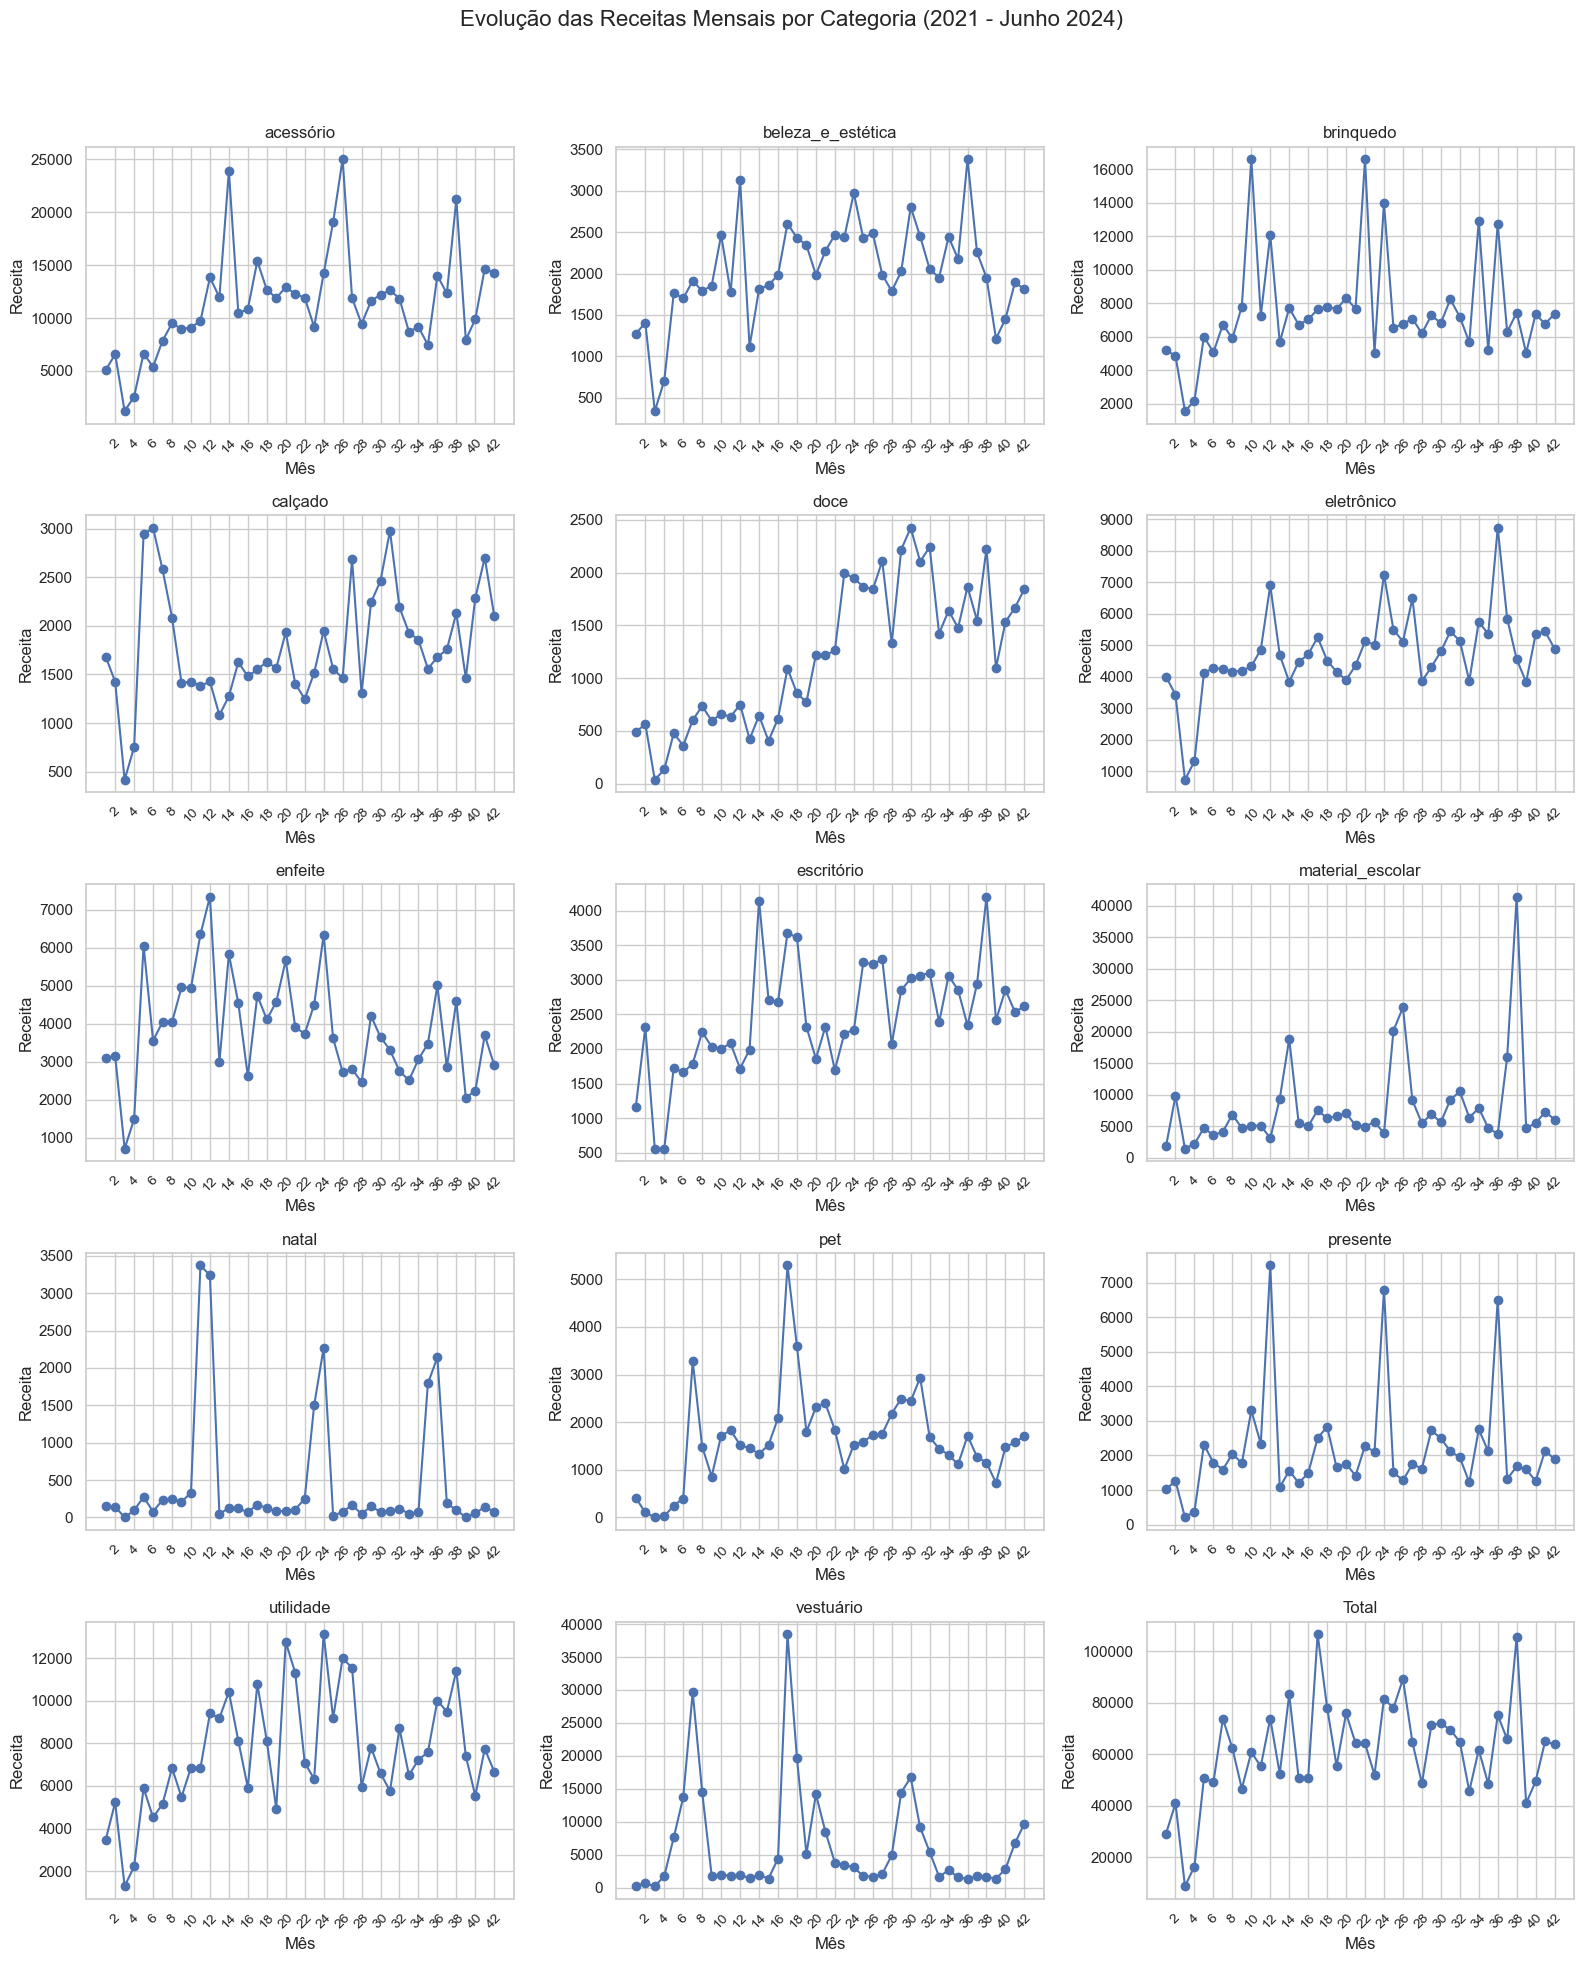

In [11]:
sns.set(style='whitegrid')

# Define o layout dos subplots em uma grade de 5x3
fig, axes = plt.subplots(5, 3, figsize=(16, 20))
fig.suptitle('Evolução das Receitas Mensais por Categoria (2021 - Junho 2024)', fontsize=16)

# Definindo as variáveis para o eixo x
meses = range(1, 43)

# Lista de categorias incluindo a linha "Total"
categorias = tabela_final.index  

# Loop para criar cada subplot
for i, categoria in enumerate(categorias):
    ax = axes[i // 3, i % 3]  # Ajuste para organizar em 5 linhas x 3 colunas
    ax.plot(meses, tabela_final.loc[categoria, :], marker='o', linestyle='-', label=categoria)
    ax.set_title(categoria)
    ax.set_xlabel('Mês', fontsize=12)  
    ax.set_ylabel('Receita')
    
    # Exibe rótulos a partir do mês 2, a cada 2 meses
    ax.set_xticks(range(2, 43, 2))  # Ticks para meses 2 a 42, a cada 2 meses
    ax.set_xticklabels(range(2, 43, 2), fontsize=10)  # Rótulos correspondentes aos meses
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Gira os rótulos do eixo x

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  

plt.show()